# Introduction To Deep Learning

## Scope
In this notebook we will get familiar with deep learning concepts, terminology and method of operation. <br>
Deep learning is a subset of broader Machine learning methods family. <br>
It utilizes artificial neural networks (ANN or NN which designed in a way that mimics the human brain) to structure algorithms that can learn and make intelligent decisions on its own.

## The Perceptron
Neural networks are composed from perceptrons and weights, each node in the neural network graph is called a perceptron which performs some kind of non-linear transformation to the input and each link is a weight which setting each input significance to the perceptron by multiplication.

To get a better grasp on what a perceptron is we will take a look in the following slide:<br>
<br><img src="images/perceptron.png" height="50%" width="50%"/><br>

$ X_1...m $ are the **inputs**, for each is a correspondent **weight** in $ W_1...m $, the multiplication of each input with its correspondent weight is summed up and this scalar is then used as an input to the **non-linear activation function** (g), this in turn yields y as the perceptron output. <br>

Note the bias factor $ W_0 $, it is used to allow the perceptron to move the activation function left-right regardless to the inputs. 

This can also be put in linear algebra equation: 
\begin{align}
\hat{y} & = g(W_0 + X^T W) \\
\end{align}

### Why non-linear activation function?
 
Lets take for example the following dataset: 
<br><br><img src="images/non-linear-data-raw.png" height="20%" width="20%"/><br>

Can we sepperate the red dots from the green dots with linear tools?
<br><br><img src="images/non-linear-data-lin.png" height="20%" width="20%"/><br><br>

The answer is not really, most of the world is non-linear, accordingly the data which upon our models are trained is non-linear, so we need to introduce non-linearity to our model as well.

Common activation functions:
* RelU - rectified linear unit - max(0,x)
* Sigmoid
* Hyperbolic tangent
<br>
<img src="images/relu.png" height="30%" width="30%"/>

## Composing a network
After walking through what is a perceptron we can see how it is used as part of the neural network.<br>
The neural network is composed of three types of layers:
- Input layer - the layer with the input nodes given to the network from external source
- Hidden layers - layers with perceptrons which the values of their weights are calculated from training
- Output layer - layer with network output nodes
<br><br>

Lets start creating a network, we will start by examining the dataset.


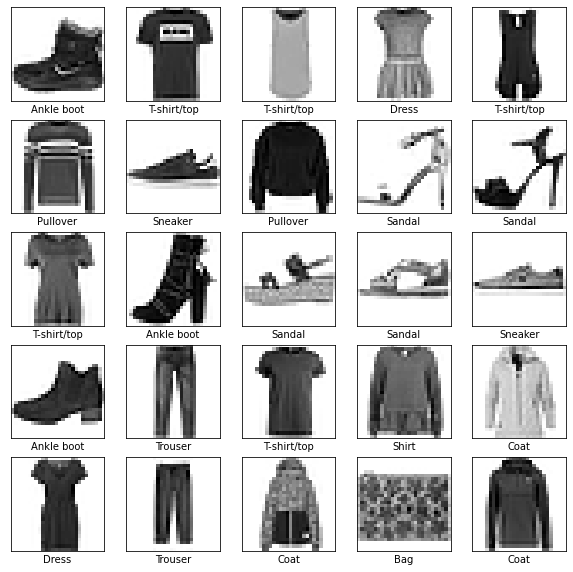

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


## Exercise - Explore the dataset
### Please go over the dataset to figure out how much objects of each category exists. Display the result in a bin chart using matplotlib

Let construct an architecture for our simple classifier, it will consist of three layers:
- Input layer - each frame is 28x28 pixels which means input layer should be 28*28=748
- Hidden layer - 128 perceptron with RelU activation function
- Output layer - 10 nodes, one for each class

The network diagram is the following: <br><br>
<img src="images/classifier-example.png" height="40%" width="40%"/>
<br>

This model contains three **dense** layers, this means that each node is connected to all the nodes in the following layer.<br>

Here is the implementation in Tensorflow

In [86]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

## Training the Model
So far we have created a model structure which is initialized with random weights to link between the different layers, if we try to use it in the current state to classify images from the dataset it probably wont do any good.
<br><br>
In order to improve the model to fullfil the wanted algorithm we need to train the model, training is essenitaly taking an input through the network, get the output and correct the network weights to do better by minimizing calculated error.<br><br>
The way that we calculate the error on each iteration is by using a **loss function**, the loss function measures the distance between the ground truth data and the predicted data. (e.g. Cross entropy loss, Mean squere error loss, etc)

#### The goal of the training phase is to minimize the calculated loss, it does so by finding the weights which results in the minimal loss.

### How does it minimizes the loss?
To answer this question lets scale down our system, lets say our system has only two weights - $ W_0 $ and $ W_1 $, now we can plot our calculated loss $ J(W_0, W_1) $ with respect to $ W_0 $ and $ W_1 $:

<br><img src="images/loss-gardient.png" height="50%" width="50%"/><br>

Even in this scaled down problem we can see that finding the minimum loss is not an easy task, if we take this problem to the real world we add many more dimensions to it.

We need to find a way to find how each of the weights in the neural network effects other weights and the final output, we need to use gardient decent each interval to "explore" the loss response to changes in weights and find the minimum loss.

Luckily there is a solution for this problem, tensorflow and many other frameworks created algorithms for this optimization, these algorithms are called **back propegation**, its essentialy calculates the gardient for each weight in the graph and allows the algorithm to optimize it towards (hopefully) the absolute minimum.

Lets continue our example:


In [87]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

* Loss function — This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* Optimizer — This is how the model is updated based on the data it sees and its loss function. (Gardient decent algorithm)
* Metrics — Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

Lets start the training:

In [88]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 2s 896us/step - loss: 3.3083 - accuracy: 0.7042 - val_loss: 0.7812 - val_accuracy: 0.7289
Epoch 2/20
1875/1875 [==============================] - 2s 884us/step - loss: 0.6348 - accuracy: 0.7750 - val_loss: 0.6188 - val_accuracy: 0.7931
Epoch 3/20
1875/1875 [==============================] - 2s 862us/step - loss: 0.5639 - accuracy: 0.8036 - val_loss: 0.6442 - val_accuracy: 0.7996
Epoch 4/20
1875/1875 [==============================] - 2s 878us/step - loss: 0.5313 - accuracy: 0.8160 - val_loss: 0.5511 - val_accuracy: 0.8124
Epoch 5/20
1875/1875 [==============================] - 2s 863us/step - loss: 0.5195 - accuracy: 0.8227 - val_loss: 0.5449 - val_accuracy: 0.8045
Epoch 6/20
1875/1875 [==============================] - 2s 872us/step - loss: 0.5001 - accuracy: 0.8286 - val_loss: 0.5774 - val_accuracy: 0.8076
Epoch 7/20
1875/1875 [==============================] - 2s 889us/step - loss: 0.4890 - accuracy: 0.8323 - val_loss: 0.5521 -

## Exercise - Train the model
### create a simple model like we defined in the previous steps and train it with MNIST dataset instead of MNIST fashion

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

Lets evaluate the how the model performs against the test dataset:


313/313 - 0s - loss: 0.5437 - accuracy: 0.8345

Test accuracy: 0.8345000147819519


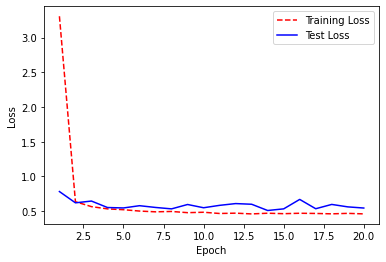

In [89]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting.
Overfitting is when during a training of a model gets too spesific to the data that its been trained on and unable to generalize well enough for new data, there are some strategies to solve this issue (e.g. dropouts, early-stop. more on that topic : https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)

## Hyperparameters - Optimization
In real world applications its not reasonable to explore the entire gardient in order to find absolute minimum, there is a need for optimization for the learning process, a solution for the problem is stocastic gardient decent, an iterative learning algorithm that uses a training dataset to update a model, SGD has several hyperparameters that controls its behavior.

**Learning Rate** - how much of a step we should take in the direction of the decent in each iteration? if we take steps too small we risk getting stuck in a local minimum, if our steps are too big we risk overshooting - we'd like to aim to a learning rate that is large enough to avoid the local minimum and small enough to still be able to converge.

<br><img src="images/learning-rate.png"/><br><br>

Tensorflow has already implemented veriety of gardient decent algorithms that adaptivly changes the learning rate depending on many variables (gardient size, loss, epochs, etc..)

**Batching** - The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

Think of a batch as a for-loop iterating over one or more samples and making predictions. At the end of the batch, the predictions are compared to the expected output variables and an error is calculated. From this error, the update algorithm is used to improve the model, e.g. move down along the error gradient.

**Epochs** - The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset, each time the algo does so it optimizes futher the model to predict the expected output.

>Example - Assume you have a dataset with 200 samples (rows of data) and you choose a batch size of 5 and 1,000 epochs.

>This means that the dataset will be divided into 40 batches, each with five samples. The model weights will be updated after each batch of five samples.

>This also means that one epoch will involve 40 batches or 40 updates to the model.

>With 1,000 epochs, the model will be exposed to or pass through the whole dataset 1,000 times. That is a total of 40,000 batches during the entire training process.




## Exercise - Hyperparameters
### Explore on the model you trained the effect of learning rate hyperparameter
* Display a graph that plots the loss of the model on both training and validation data
* Change the number of epochs, point where you would early-stop the model training
* Change the learning rate and try to reproduce the conditions described in the learning rate photos (local-minimum, over-shooting)
> NOTE: you have to recreate the model before each training, otherwide the fit fuction trains the trained model again with the preinitialized values